### 1 Introduction

This assignment aims to compare the performance of various image smoothing filters applied to noisy images. The filters under consideration include simple smoothing filters such as Box filter, Gaussian filter, and Median filter, as well as advanced filters like Bilateral filter and Adaptive Median filter. The evaluation will focus on noise removal effectiveness, edge preservation, computational efficiency, and the influence of kernel size on the performance of each filter. Quantitative metrics such as Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR) will be used for comparison.

#### Filters to be Used:

1. **Box Filter**:
   - Averages the pixel values within a defined kernel size, effective for noise reduction but can blur edges.

2. **Median Filter**:
   - Replaces each pixel with the median value of its neighboring pixels, effective for removing salt-and-pepper noise while preserving edges.

3. **Gaussian Filter**:
   - Applies a Gaussian function to the neighboring pixels, smoothing the image while preserving edges better than the Box filter.

4. **Bilateral Filter**:
   - Considers both spatial distance and intensity difference between pixels, smoothing the image while preserving edges by combining Gaussian smoothing in both spatial and intensity domains.

5. **Adaptive Median Filter**:
   - Adapts the size of the filtering window based on local image characteristics, effectively removing noise while preserving edges and fine details.

The comparison of these filters will provide insights into their strengths and weaknesses in different aspects of image processing, highlighting their suitability for various applications.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import utilities as utils
import os
import metrics
import filters
import visualization as vis
from sklearn.metrics import mean_squared_error


### 2 Description of Images

The images used in this analysis are categorized based on the level of detail they contain. The categories are as follows:

1. **Low Details**:
   - These images contain minimal detail and are typically characterized by large, uniform regions with little texture or fine structure. They are often used to evaluate the performance of filters in preserving smooth areas while removing noise.

2. **Medium Details**:
   - These images contain a moderate amount of detail, including some texture and fine structures. They provide a balanced scenario to test the effectiveness of filters in both noise removal and edge preservation.

3. **High Details**:
   - These images are rich in detail, with intricate textures and fine structures. They are used to assess the ability of filters to preserve edges and fine details while effectively reducing noise.

The images are processed and analyzed to compare the performance of various filters, including Box filter, Gaussian filter, Median filter, Bilateral filter, Adaptive Median filter, and Canny edge detector. The evaluation focuses on noise removal effectiveness, edge preservation, computational efficiency, and the influence of kernel size on the performance of each filter.

The cell below shows the images to be worked on for this assignment.

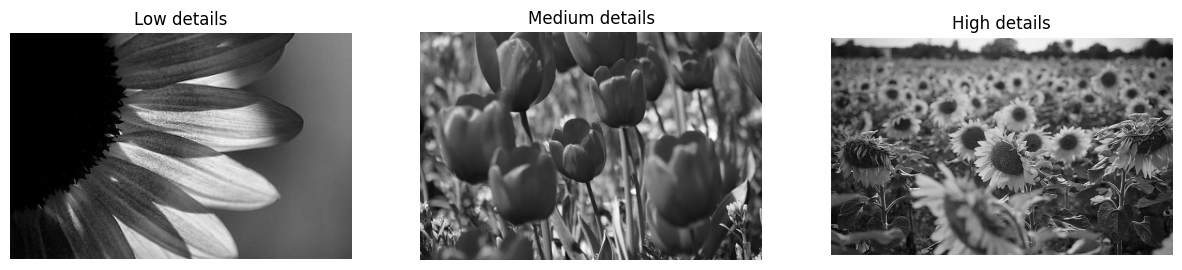

In [ ]:
list_of_images = []
PATH = 'images'

images_dir = os.listdir(PATH)
images_dir.sort()

# Iterate over images
for images in images_dir: 
    image = cv2.imread(os.path.join(PATH, images), cv2.IMREAD_GRAYSCALE)
    list_of_images.append(image)

titles = ["Low details", "Medium details", "High details"]
    
vis.plot_images(list_of_images, titles)

### 3 Noise Generation and Application on Images

In this section, we will discuss the process of generating noise and applying it to images. Noise is an unwanted random variation in the pixel values of an image, which can degrade the visual quality and affect the performance of image processing algorithms. Different types of noise can be introduced to simulate real-world scenarios and evaluate the robustness of image processing techniques.

#### Types of Noise:

1. **Gaussian Noise**:
    - Gaussian noise is characterized by a normal distribution of pixel values around the mean. It is commonly used to simulate sensor noise in digital images. The noise level can be controlled by adjusting the mean and standard deviation of the distribution.

2. **Salt and Pepper Noise**:
    - Salt and pepper noise, also known as impulse noise, is characterized by randomly occurring white and black pixels in the image. It is typically caused by faulty camera sensors, transmission errors, or corrupted image files. The noise level can be controlled by adjusting the probability of occurrence of the white and black pixels.

#### Applying Noise

To evaluate the performance of various image smoothing filters, we apply different types of noise to the original images. This allows us to test the effectiveness of the filters in removing noise while preserving important image details such as edges and textures.

The following steps are involved in applying noise to images:

1. **Load the Original Image**:
    - The original image is loaded from the specified directory.

2. **Generate Noise**:
    - Noise is generated based on the specified type (Gaussian or Salt and Pepper) and noise level (low, medium, high).



#### Applying Noise to Images:

- The cell below calls  a function that creates a pandas dataframe for each image. This dataframe indices has the noise variations of the image, including the original image.

- For instance, `df['Gaussian Noise (medium)']` fetches the image corrupted with medium gaussian noise.




In [3]:
dataframes = []

for image in list_of_images:
    df = utils.create_dataframe_image(image)
    dataframes.append(df)

#### Visualization of different noises on the 3 images:

The cell below shows each of noises with different levels of intensities, applied on all of the images.

In [9]:
# Define the noise types to display

noise_types = ['Gaussian Noise', 'Salt and Pepper Noise']
intensities = ['low', 'medium','high']

for intensity in intensities:
    vis.plot_original_noisy_images(dataframes, noise_types, intensity)

AttributeError: module 'visualization' has no attribute 'plot_original_noisy_images'

In [4]:
kernel_sizes = [(2*i + 1) for i in range(1, 10)]

In [ ]:
# Iterate over all images and save in a tree structured directory

utils.create_or_replace_dir('Images_filtered')


for i in range(len(dataframes)):
    filters.save_filtered_images(dataframes[i], f'image_{i}', kernel_sizes=kernel_sizes)

In [5]:
base_dir = 'Images_filtered'
original_image_name = 'image_0'
noise_levels = os.listdir(os.path.join(base_dir, original_image_name))
noise_types = os.listdir(os.path.join(base_dir, original_image_name, noise_levels[0]))
filter_types = os.listdir(os.path.join(base_dir, original_image_name, noise_levels[0], noise_types[0]))

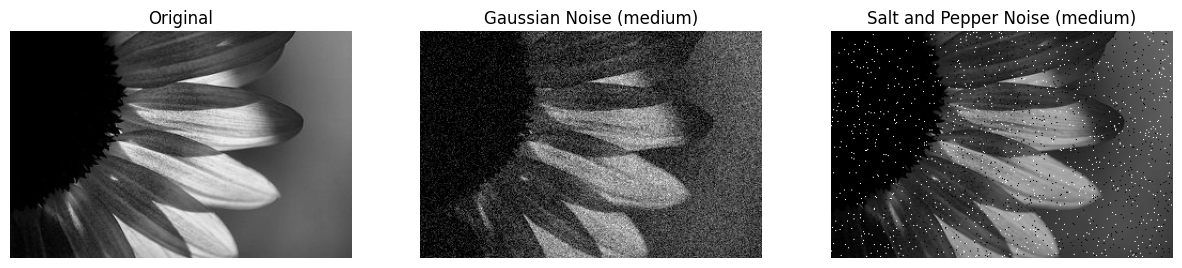

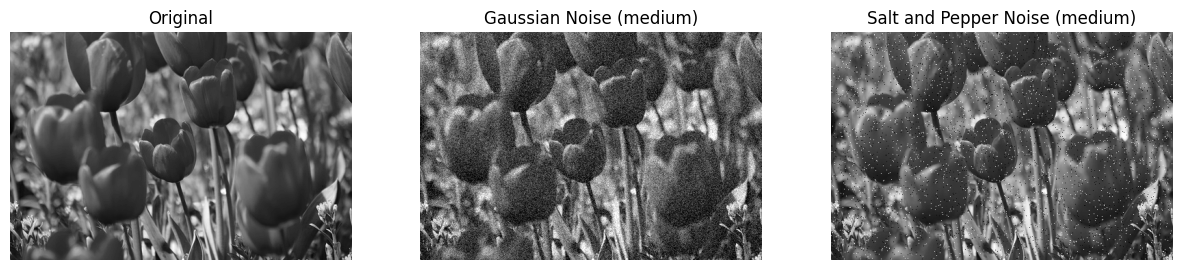

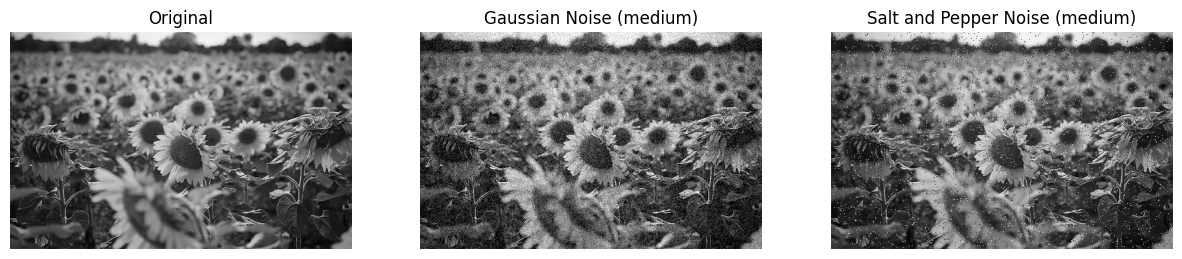

In [ ]:
dd

In [ ]:
for i in range(len(dataframes)):


  original_image_name = f'image_{i}'
  original_image = dataframes[i].loc['no_noise', 'Image']
    
  psnr_dict_outer, kernels = metrics.collect_metric_values_for_all_filters_and_noise_types(metrics.calculate_psnr,
                                                                                        base_dir,
                                                                                        original_image_name,
                                                                                        original_image
                                                                                      )

  vis.plot_metric_vs_kernel(psnr_dict_outer,
                            'Peak Signal To Noise Ratio (PSNR)',
                            noise_levels, filter_types,
                            kernels,
                            i  
                            )

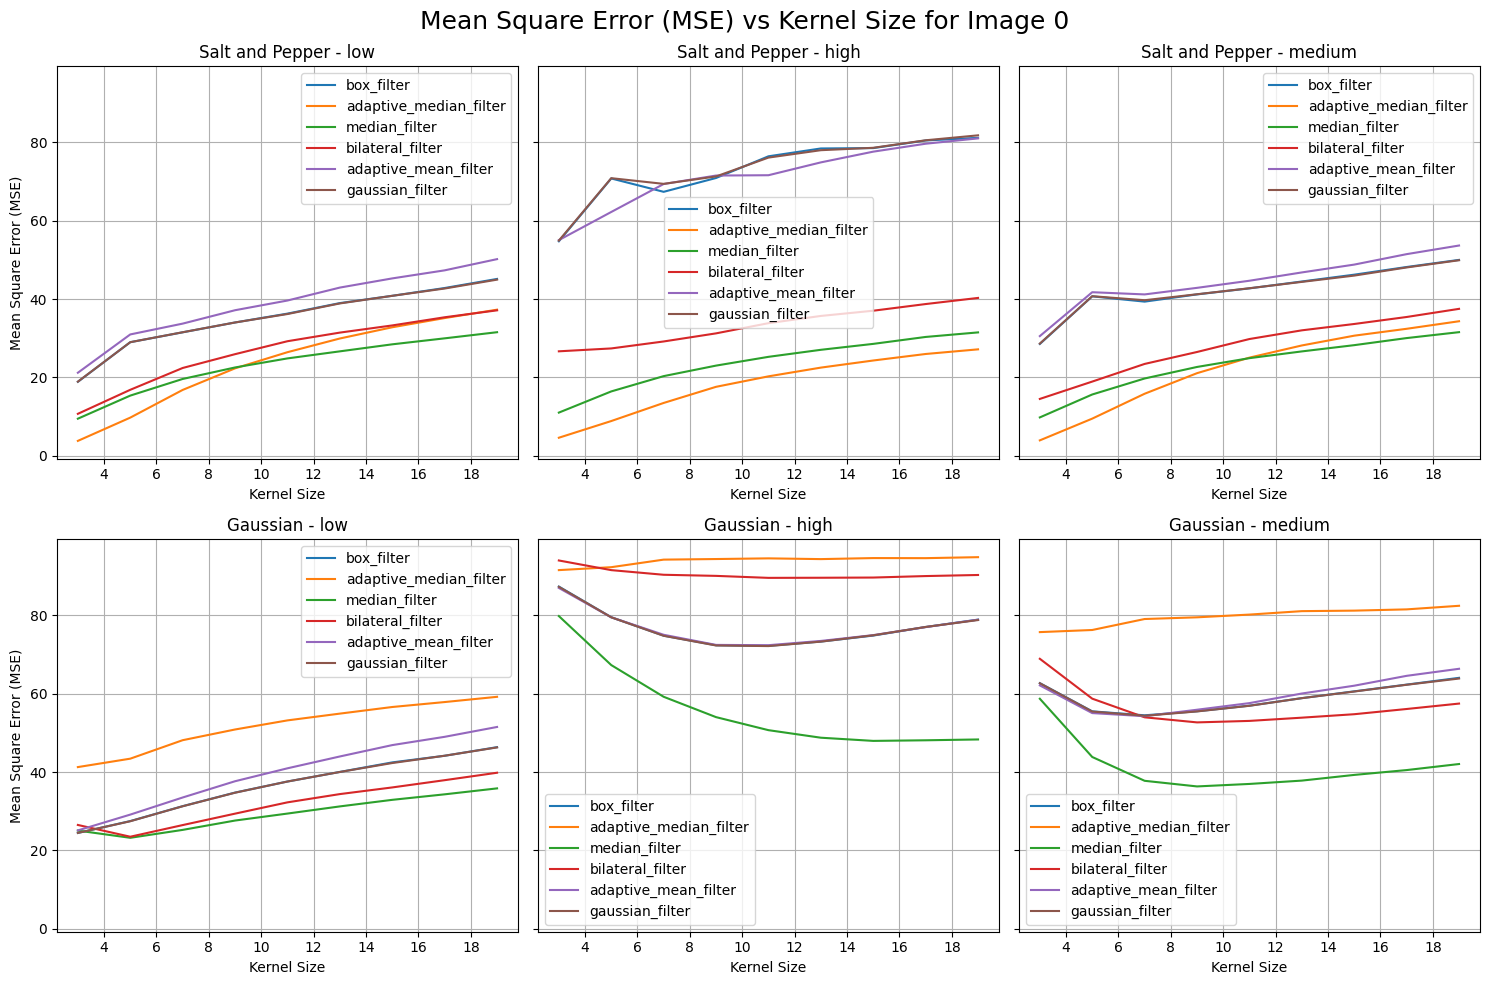

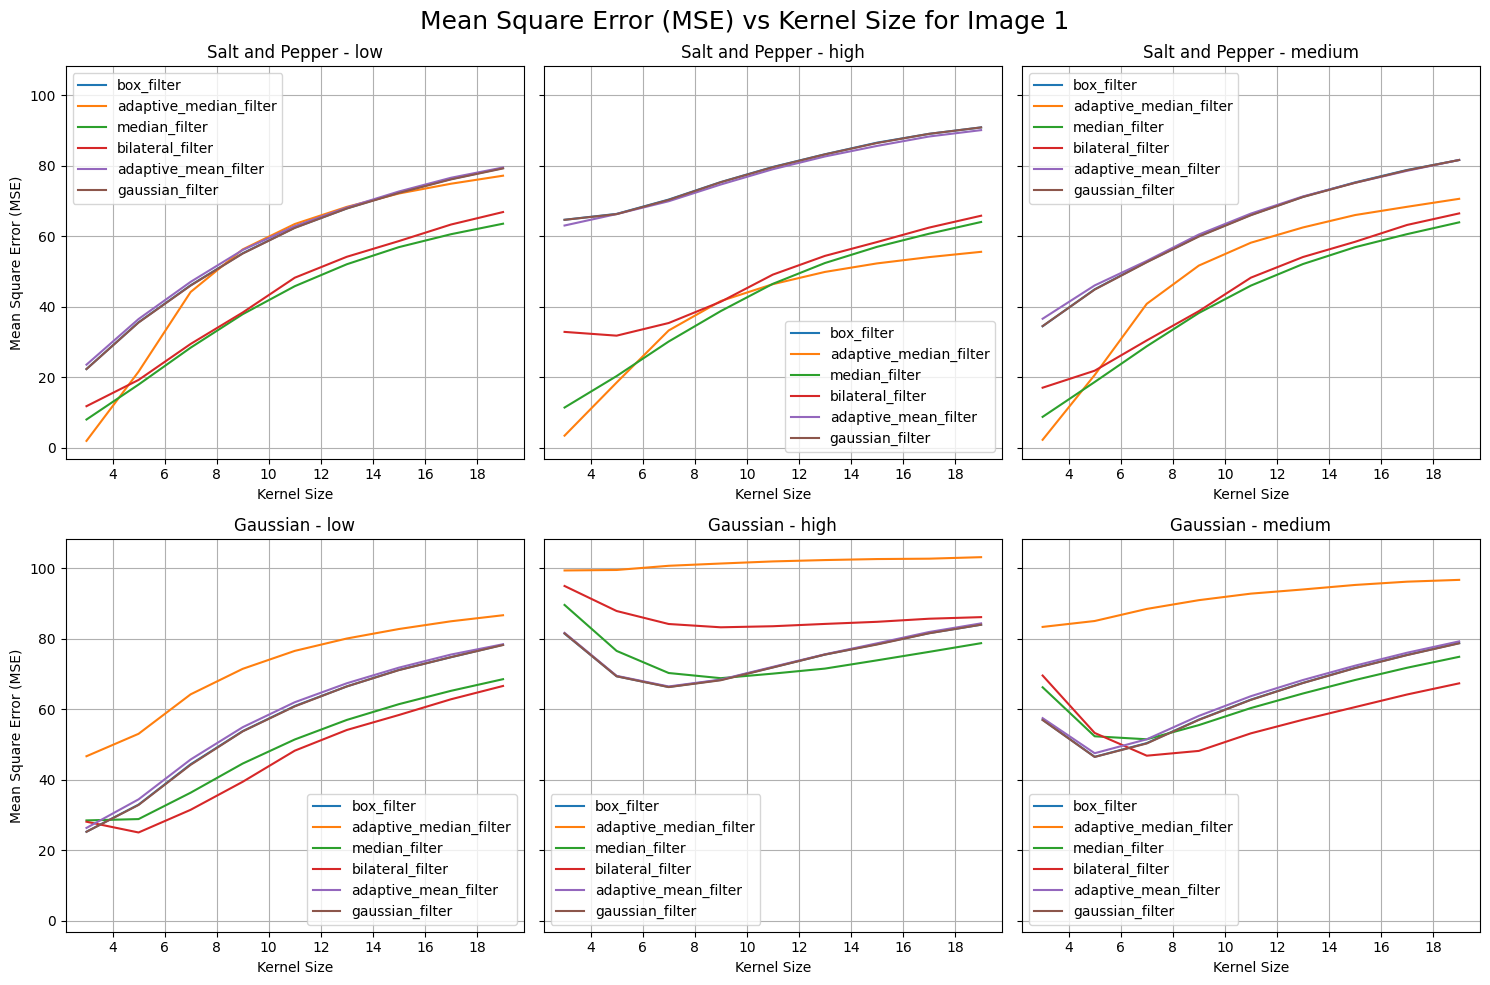

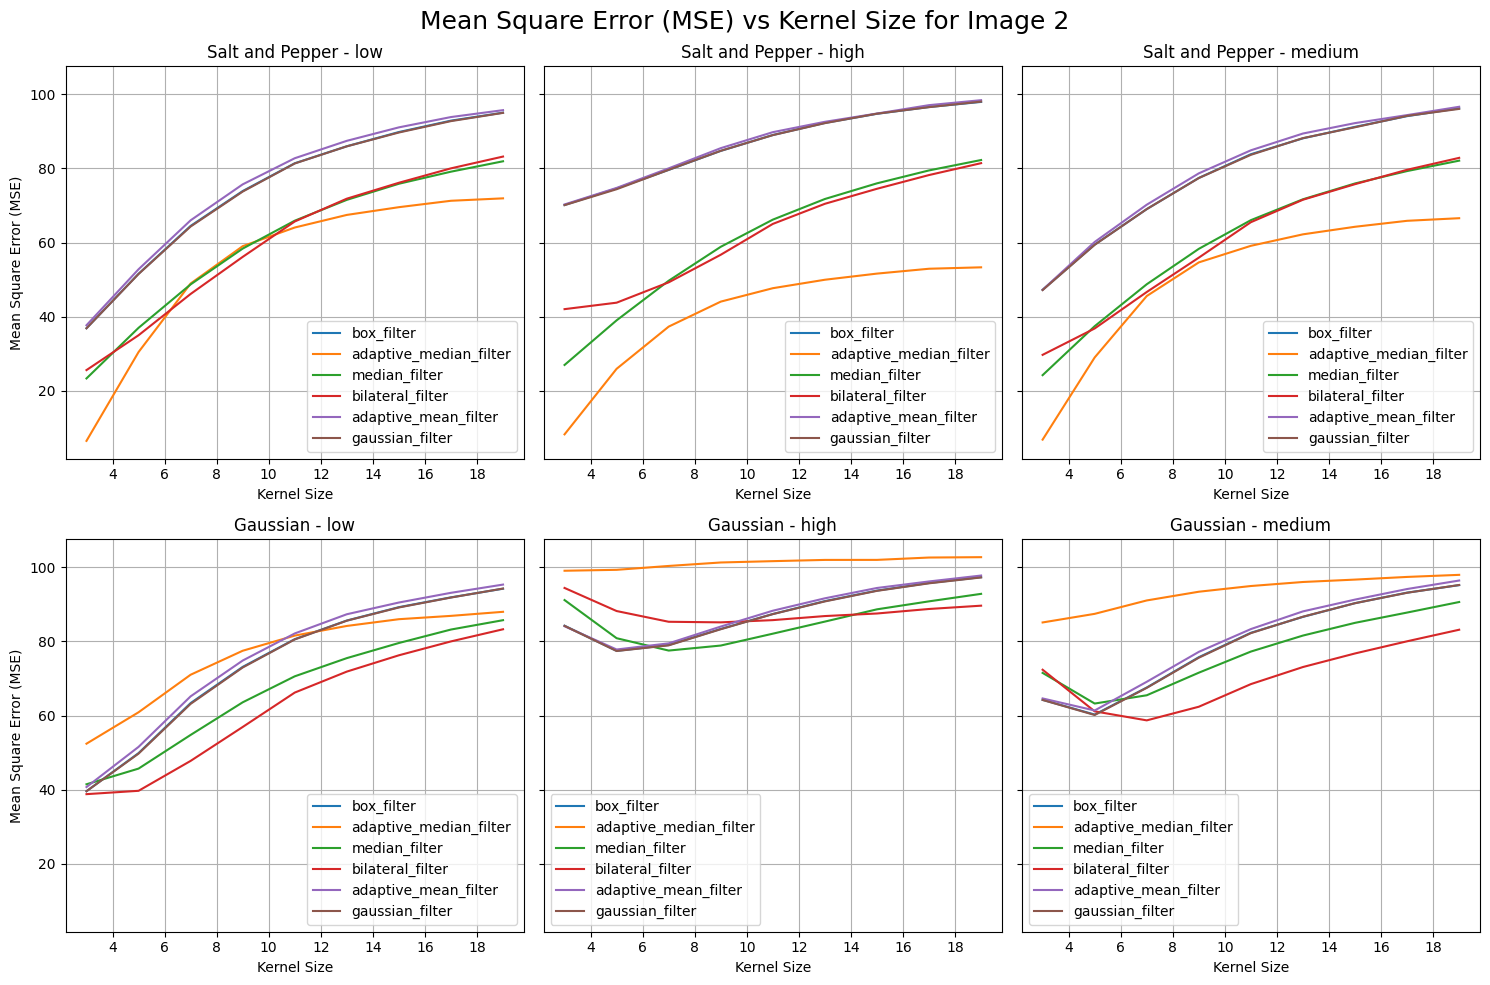

In [8]:
for i in range(len(dataframes)):

    original_image_name = f'image_{i}'
    original_image = dataframes[i].loc['no_noise', 'Image']
    

    mse_dict_outer, kernels = metrics.collect_metric_values_for_all_filters_and_noise_types(mean_squared_error, 
                                    base_dir, 
                                    original_image_name, 
                                    original_image,
                                )

    vis.plot_metric_vs_kernel(mse_dict_outer,'Mean Square Error (MSE)', noise_levels, filter_types, kernels, i)

In [ ]:
image = dataframes[0].loc['no_noise', 'Image']
times = metrics.collect_filter_times(image, filter_types, kernel_sizes=kernel_sizes)

times.set_index(['Filter Type', 'Kernel Size'], inplace=True)

df_unstacked = times['Time'].unstack(level=0)

df_unstacked


In [ ]:
vis.plot_time_vs_kernel(times);

In [ ]:
image = dataframes[0].loc['Gaussian Noise (high)', 'Image']
times = metrics.collect_filter_times(image, filter_types, kernel_sizes=kernel_sizes)

times.set_index(['Filter Type', 'Kernel Size'], inplace=True)

df_unstacked = times['Time'].unstack(level=0)

df_unstacked

In [ ]:
image = cv2.imread('Images_filtered/image_0/medium/Salt and Pepper/adaptive_median_filter/image_0_Salt and Pepper_medium_adaptive_median_filter_k7.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(image, 50, 150)
plt.imshow(edges, cmap='gray')

In [ ]:
plt.imshow(image, cmap='gray');